In [1]:
import numpy as np
from scipy import stats
import datetime
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from workalendar.usa import UnitedStates
from operator import itemgetter

import pandas as pd

from product_class import Product

In [2]:
products = list(np.load('office_products_sorted_ph.npy', allow_pickle=True))
# products = list(np.load('product_electronics_50_price_history.npy', allow_pickle=True))
sample_product = products[20]

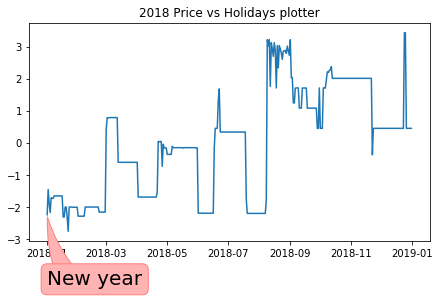

In [23]:
sample = Product(sample_product)
year = 2018
plot = True
df_year = sample.df[:][sample.df['amazon_time'].dt.year == year]
        
cal=UnitedStates()
us_holidays, _ = zip(*cal.holidays(year))

holiday_prices = sample.df[['amazon_time', 'standardized']][sample.df['amazon_time'].dt.date.isin(us_holidays)]
holiday_prices = holiday_prices.set_index(['amazon_time'])
# print(holiday_prices.head())

if plot:
    #Plot the dates against prices
    fig, ax = plt.subplots(constrained_layout=True)
    locator = mdates.AutoDateLocator()
    formatter = mdates.AutoDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    #Plot holiday lines
    for holiday in us_holidays:
        # plt.axvline(holiday, color = 'r')
        pass

    ax.plot(df_year['amazon_time'], df_year['standardized'])
    ax.set_title('%d Price vs Holidays plotter' % (year))
    
    #Goal: add annotations to the following four holidays: ['New year', 'Independence Day', 'Thanksgiving Day', 'Christmas Day']
    ann_labels = ['New year', 'Independence Day', 'Thanksgiving Day', 'Christmas Day']
    top_hols_dates = [hol[0] for hol in cal.holidays(year) if hol[1] in ann_labels] #Holidays as date_time objects
    
    for hol, hol_date in zip(ann_labels, top_hols_dates):
        ann = ax.annotate(hol,
                  xy=(hol_date, holiday_prices.loc[hol_date, 'standardized']), xycoords='data',
                  xytext=(0, -70), textcoords='offset points',
                  size=20,
                  bbox=dict(boxstyle="round",
                            fc=(1.0, 0.7, 0.7),
                            ec=(1., .5, .5)),
                  arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                  fc=(1.0, 0.7, 0.7), ec=(1., .5, .5),
                                  patchA=None,
                                  patchB=None,
                                  relpos=(0.2, 0.8),
                                  connectionstyle="arc3,rad=-0.1"))
        break


    # ax.plot(holiday_prices['amazon_time'], holiday_prices['standardized'], 'x', color = 'g')

In [ ]:
product_object = Product(sample_product)
# print(product_object.amazon_price_history)
print(product_object.df.head())
# print(product_object.mean)
# print(product_object.max)
# print(product_object.derivative_prices(product_object.df['amazon_price']))

# print(product_object.mode)
# print(product_object.std)
print('----------------------------')
product_object.price_holiday_correlation(2014, True)

In [ ]:
cal=UnitedStates()
print(cal.holidays(2017))
# us_holidays, _ = zip(*cal.holidays(2018))
# print(us_holidays)